### Random Forests Example 1.1


We illustrate the basic idea of the bootstrap method above by means of an example. Consider the following **Python**-code. We generate $2000$ samples from a two-dimensional Gaussian normal distribution $(X,Y)$, where the variances $s_X^2$ and $s_Y^2$ of the individual variables are $1$ and the covariance $s_{XY}$ equals $0.7$. We estimate these quantities by means of the sample variance and covariance and get the following result

In [4]:
import numpy as np
import random

# set random seed
np.random.seed(0)

# Sample from 2D normal distribution
n_samples = 2000
cov = [[1, 0.7], [0.7, 1]]

mean_dist = [0, 1.1]

samp_data = np.random.multivariate_normal(mean_dist, cov, size=n_samples)

cov_est = np.cov(samp_data.T)
print(cov_est)

[[0.96109765 0.67805094]
 [0.67805094 0.9716846 ]]


Since we know the underlying truth, we can assess the quality of the estimate. In practice, however, the true values are unknown and we have to find other means to measure the quality of e.g. the estimate $\hat s_{XY} = 0.678$.

To estimate the accuracy of $\hat s_{XY}$ we now repeat the process of sampling data from the joint normal distribution and for each sample we compute $\hat s_{XY}$ such that after some time we end up with many (say $B$) estimates $\hat s_{XY,1},\dots, \hat s_{XY, B}$. The empirical distribution $\hat F$ of these values approximates the true distribution $F$ of $\hat s_{XY}$.

In [4]:
B = 1000

# Define procedure in a definition
def cov_resample_dist(mean_dist, cov, n_sampl=n_samples):
    """ Take n_sampl samples from normal distribution with 
    given mean and covariance and return estimated covariance"""
    samp_data = np.random.multivariate_normal(mean_dist, cov, 
                                              size=n_sampl)
    s_est = np.cov(samp_data.T)[0][1]
    return s_est

# Repeat procedure B times
hat_s = []
for i in range(B):
    hat_s.append(cov_resample_dist(mean_dist, cov, 
                                   n_sampl=n_samples))

# Print mean
print(np.mean(hat_s))

0.698324093930985


Until now we have been using the underlying Method (`random.multivariate_normal()`), instead of a dataset. We will now use a dataset and sample with replacement. 

Of course the problem here is again the fact, that we use the true underlying distribution of $X$ and $Y$ to simulate the data. Put differently, this method is not applicable in practice. What can be done, however, is to successively sample from the data *with replacement* and computing the corresponding estimators. These are then called the *bootstrap estimators* and their distribution $\hat F^*$ approximates the true underlying distribution of $\hat s_{XY}$. The following code-chunk implements the bootstrap method explicitely.

In [5]:
# Define procedure in definition:
def cov_resample_data(data, n_sampl=n_samples):
    """ Take n_sampl samples(with replacement) from 
    given dataset and return estimated covariance"""
    samp_data_i = np.random.choice(range(len(data)), 
                                   replace=True, 
                                   size=n_samples)
    samp_data = data[samp_data_i]
    s_boots = np.cov(samp_data.T)[0][1]
    return s_boots

# Repeat procedure B times
hat_s_boot = []
for i in range(B):
    hat_s_boot.append(cov_resample_data(samp_data, n_sampl=n_samples))

# Print mean
print(np.mean(hat_s_boot))

0.6778391598165159


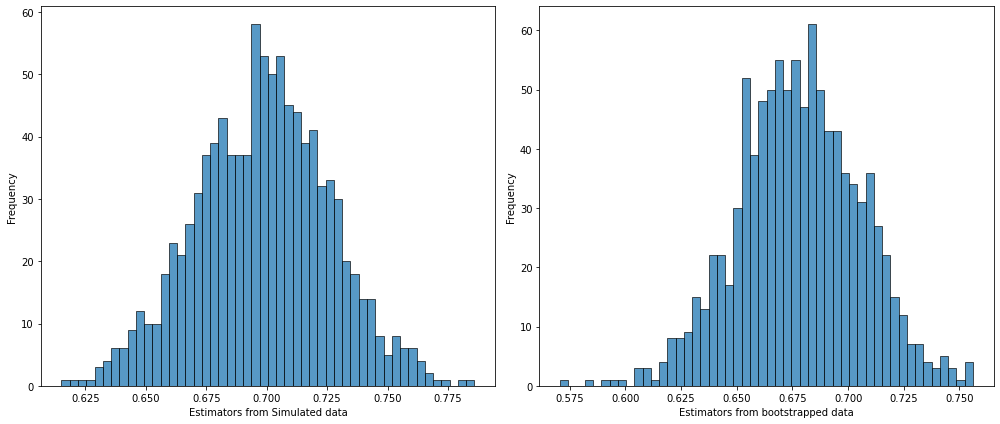

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
sns.histplot(hat_s, bins=50, kde=False)
ax1.set_xlabel('Estimators from Simulated data')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(hat_s_boot, bins=50, kde=False)
ax2.set_xlabel('Estimators from bootstrapped data')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms of the estimated covariances can be seen. On the left we have the distribution, when new samples are generated in each run. On the right the bootstrapped samples are shown. The histograms look very similar, but note again that the left picture is not available in practice, because new samples are required. In contrast, the right histogram can be computed by resampling the original data set.

Now, let $\hat s_{XY,1}^*,\dots, \hat s_{XY,B}^*$ be the bootstrapped estimators for the covariance of $X$ and $Y$. Then, we can estimate the standard error of the estimated covariance $\hat s_{XY}$ by the bootstrap estimate
\begin{align*}
\text{se}_B(\hat s_{XY}) & = \sqrt{\frac{1}{B-1}\sum_{i=1}^B \left(\hat s_{XY,i}^* - \bar s_{XY}^*\right)^2},\quad \text{with}\\
\bar s_{XY}^* & = \frac{1}{B} \sum_{i=1}^B \hat s_{XY,i}^*.
\end{align*}

In our example this gives a value of $\text{se}_B(\hat s_{XY}) = 0.028$. With this we can for instance give a $95\%$-confidence interval for the covariance:
\begin{equation}
\bar s_{XY}^* \pm 2\cdot \text{se}_B(\hat s_{XY}) = [0.65, 0.76 ].
\end{equation}

In **Python** the function **sklearn.utils.resample()** implements the resampling routines. The computation of the bootstrapped covariances then reads as follows:

In [24]:
from sklearn.utils import resample

hat_s_sklearn = []
for i in range(B):
    samp_data = resample(samp_data, n_samples=n_samples)
    hat_s_sklearn.append(np.cov(samp_data.T)[0][1])
    
print(np.mean(hat_s_sklearn))

0.6851533851754641
